**IMPORTING NECESSARY LIBRARIES**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm


from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier

**LOADING THE DATA**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/INDUSTRY GRADE PROJECT EDUREKA/train(1).csv")

In [3]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


# **1. Write at least 3 important inferences from the data above**

In [6]:
print('Data types and null values:')
print(df.info())

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-n

# **2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?**


In [7]:
target_balance = df['target'].value_counts(normalize=True) * 100
print('\nTarget variable balance (%):')
print(target_balance)


Target variable balance (%):
0    96.355248
1     3.644752
Name: target, dtype: float64


# **3. How many categorical features are there?**


In [8]:
categorical_features = df.select_dtypes(include=['object']).columns
print('\nNumber of categorical features:')
print(len(categorical_features))


Number of categorical features:
0


# **4. How many binary features are there?**


In [11]:
binary_features = [col for col in df if df[col].nunique() == 2]
print('\nNumber of binary features:')
print(len(binary_features))


Number of binary features:
20


# **5. Write inferences from data on interval variables.**


In [12]:
interval_features = [col for col in df.columns if 'reg' in col or 'car' in col and 'cat' not in col]
print('\nInterval features:')
print(interval_features)


Interval features:
['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']


# **6. Write inferences from data on ordinal variables.**


In [13]:
ordinal_features = [col for col in df.columns if 'ind' in col and 'bin' not in col and 'cat' not in col]
print('\nOrdinal features:')
print(ordinal_features)


Ordinal features:
['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15']


# **7. Write inferences from data on binary variables.**


In [14]:
print('\nBinary features:')
print(binary_features)


Binary features:
['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_02_cat', 'ps_car_08_cat', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


# **8. Check if the target data is proportionate or not.**


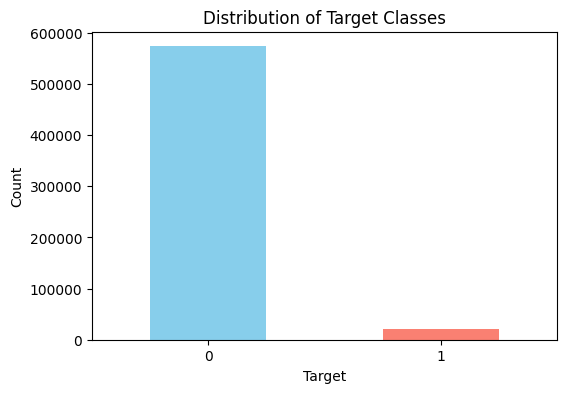

In [22]:
plt.figure(figsize=(6, 4))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Classes')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# **----------------SOME GRAPHS-----------------------**

Plotting distributions:   0%|          | 0/5 [00:00<?, ?it/s]

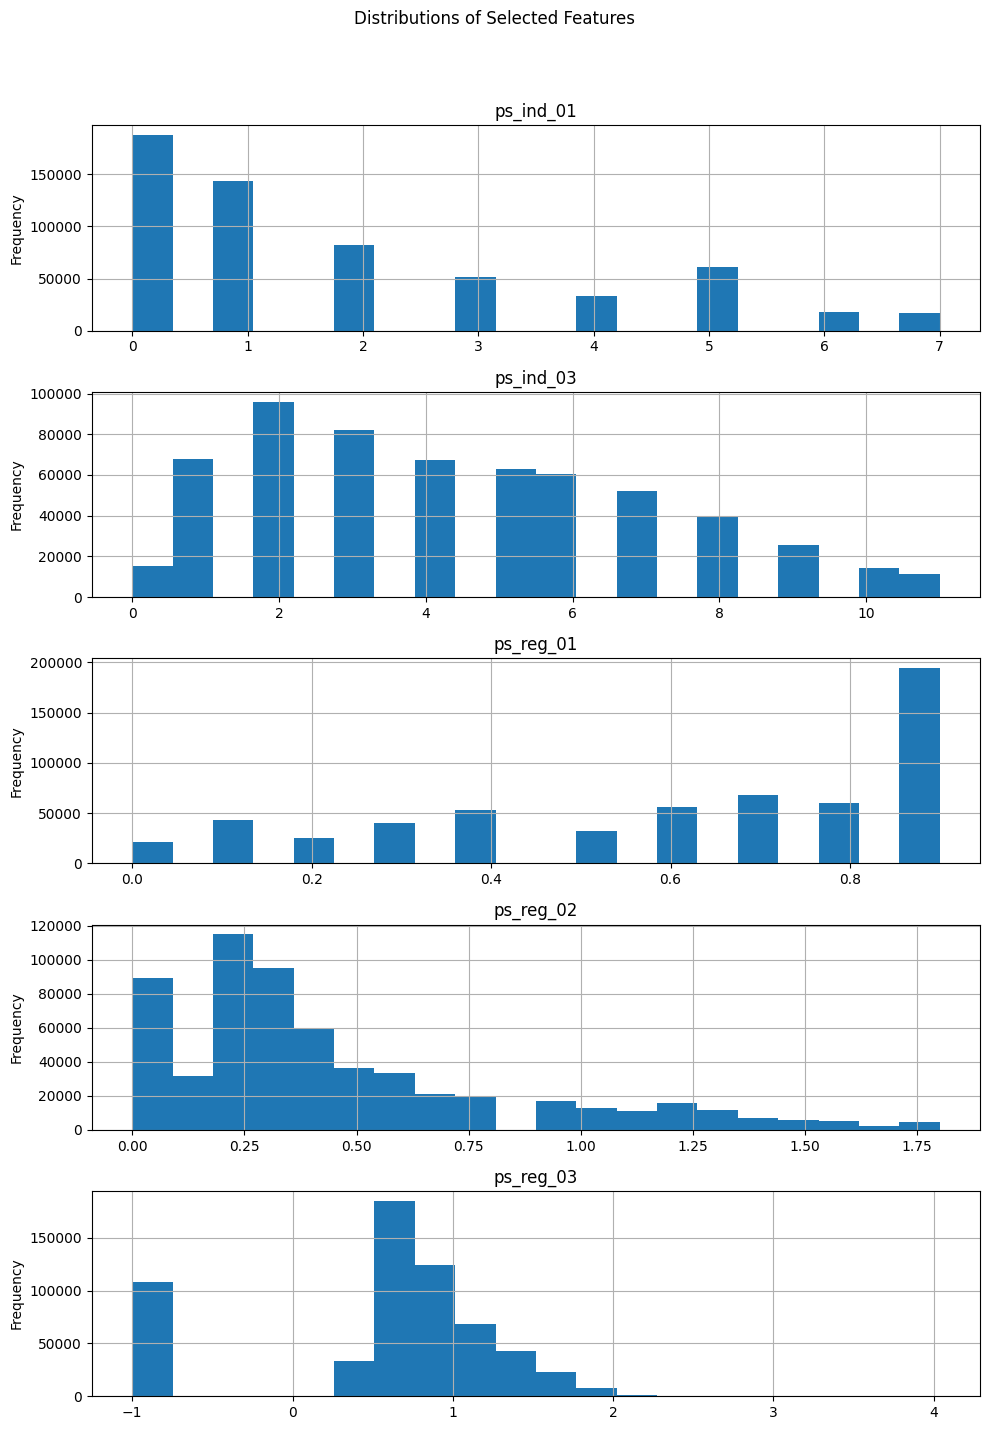

In [21]:
# Selecting a subset of columns to plot
subset_columns = ['ps_ind_01', 'ps_ind_03', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03']

# Plotting distributions
fig, axes = plt.subplots(len(subset_columns), 1, figsize=(10, 15))
fig.suptitle('Distributions of Selected Features')

for i, col in enumerate(tqdm(subset_columns, desc='Plotting distributions')):
    df[col].hist(ax=axes[i], bins=20)
    axes[i].set_title(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **9.What should be the preferred way in this case to balance the data?**

Imbalanced datasets, especially in binary classification problems, may lead to biased models. So think this should be some strategies to address class imbalance:

**1.Resampling:**

*  Oversampling: Increasing the number of instances of the minority class.
*  Undersampling: Decreasing the number of instances of the majority class.

**2.Synthetic Data Generation:**

*  Using techniques like SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic examples of the minority class.

**3.Algorithmic Approaches:**

*  Using algorithms that handle imbalanced data well, such as ensemble methods like Random Forest and gradient boosting.

# **1. Using SMOTE**

In [23]:
balance = df['target'].value_counts(normalize=True)
print('Class balance:\n', balance)

# Separating majority and minority classes
df_majority = df[df.target==0]
df_minority = df[df.target==1]

# Upsampling minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=df_majority.shape[0],
                                 random_state=123)

# Combining majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

Class balance:
 0    0.963552
1    0.036448
Name: target, dtype: float64


# **10. How many training records are there after achieving a balance of 12%?**


In [24]:
new_balance = df_upsampled['target'].value_counts(normalize=True)
print('New class balance:\n', new_balance)

New class balance:
 0    0.5
1    0.5
Name: target, dtype: float64


# **11. Which are the top two features in terms of missing values?**

👉**NO MISSING VALUES**

# **12. In total, how many features have missing values?**


In [26]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print('\nFeatures with missing values:')
print(missing_values)


Features with missing values:
Series([], dtype: int64)


# **13. What steps should be taken to handle the missing data?**

👉These are the steps that can be taken to handle missing data.

**1.Identify Missing Data:**

*  By Determining which features have missing values.

**2.Imputation:**

*  Using methods like mean, median, or more advanced techniques for imputing missing values.

**3.Deletion:**

*  In some cases, it might be appropriate to remove rows or columns with missing values.

# **14. Which interval variables have strong correlation?**


In [29]:
interval_correlation = df[interval_features].corr()
print('\nCorrelation matrix for interval features:')
interval_correlation


Correlation matrix for interval features:


,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
ps_reg_01,1.000000,0.471027,0.637035,0.077168,0.018802,0.027097,0.012704,0.002765
ps_reg_02,0.471027,1.000000,0.516457,0.068159,0.171416,0.194316,0.004147,0.054510
ps_reg_03,0.637035,0.516457,1.000000,0.080386,0.082578,0.099415,0.006271,0.022930
ps_car_11,0.077168,0.068159,0.080386,1.000000,0.056829,0.101797,-0.057656,0.109683
ps_car_12,0.018802,0.171416,0.082578,0.056829,1.000000,0.671720,0.012395,0.049882
ps_car_13,0.027097,0.194316,0.099415,0.101797,0.671720,1.000000,-0.037310,0.529519
ps_car_14,0.012704,0.004147,0.006271,-0.057656,0.012395,-0.037310,1.000000,-0.033060
ps_car_15,0.002765,0.054510,0.022930,0.109683,0.049882,0.529519,-0.033060,1.000000


# **15. What's the level of correlation among ordinal features?**


In [31]:
ordinal_correlation = df[ordinal_features].corr()
print('\nCorrelation matrix for ordinal features:')
ordinal_correlation


Correlation matrix for ordinal features:


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15
ps_ind_01,1.000000,0.223408,-0.024971,0.122137
ps_ind_03,0.223408,1.000000,0.001990,0.170449
ps_ind_14,-0.024971,0.001990,1.000000,-0.121547
ps_ind_15,0.122137,0.170449,-0.121547,1.000000


# **16. Implement Hot Encoding for categorical features**

**S**ince there are **no categorical features detected**, we will assume 'cat' in column names indicates categorical

**Selecting columns that end with '_cat'**

In [32]:
categorical_columns = [col for col in df.columns if col.endswith('_cat')]

# One-Hot Encoding the categorical variables
encoded_data = pd.get_dummies(df, columns=categorical_columns)

In [34]:
encoded_data.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **17. In nominal and interval features, which features are suitable for StandardScaler?**


In [35]:
# Identifying nominal and interval features suitable for StandardScaler
# Here Nominal features will be the newly created one-hot encoded columns

# We have aleady identified Interval features previously
nominal_features = [col for col in encoded_data.columns if '_cat_' in col]
interval_features = ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

In [36]:
# Summarizing the features suitable for StandardScaler
features_for_scaling = nominal_features + interval_features
print('Features suitable for StandardScaler:')
print(features_for_scaling)

Features suitable for StandardScaler:
['ps_ind_02_cat_-1', 'ps_ind_02_cat_1', 'ps_ind_02_cat_2', 'ps_ind_02_cat_3', 'ps_ind_02_cat_4', 'ps_ind_04_cat_-1', 'ps_ind_04_cat_0', 'ps_ind_04_cat_1', 'ps_ind_05_cat_-1', 'ps_ind_05_cat_0', 'ps_ind_05_cat_1', 'ps_ind_05_cat_2', 'ps_ind_05_cat_3', 'ps_ind_05_cat_4', 'ps_ind_05_cat_5', 'ps_ind_05_cat_6', 'ps_car_01_cat_-1', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_01_cat_3', 'ps_car_01_cat_4', 'ps_car_01_cat_5', 'ps_car_01_cat_6', 'ps_car_01_cat_7', 'ps_car_01_cat_8', 'ps_car_01_cat_9', 'ps_car_01_cat_10', 'ps_car_01_cat_11', 'ps_car_02_cat_0', 'ps_car_02_cat_1', 'ps_car_03_cat_-1', 'ps_car_03_cat_0', 'ps_car_03_cat_1', 'ps_car_04_cat_0', 'ps_car_04_cat_1', 'ps_car_04_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_04_cat_8', 'ps_car_04_cat_9', 'ps_car_05_cat_-1', 'ps_car_05_cat_0', 'ps_car_05_cat_1', 'ps_car_06_cat_0', 'ps_car_06_cat_1', 'ps_car_06_cat_2', 'ps

In [39]:
scaler = StandardScaler()

# Features identified for scaling
features_for_scaling = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']

# Selecting the features from the dataset
features_to_scale = df[features_for_scaling]

# Applying StandardScaler
scaled_features = scaler.fit_transform(features_to_scale)

scaled_features_df = pd.DataFrame(scaled_features, columns=features_for_scaling)

scaled_features_df.head()

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,...,ps_car_10_cat,ps_car_11_cat,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,0.964585,1.182227,-0.299997,0.679380,0.452653,-0.627780,-0.336757,1.371044,-0.464486,0.259209,...,0.085839,-1.521114,0.309442,-0.591654,0.210419,-0.415678,0.343841,0.313526,0.264742,0.737869
1,-0.540094,-0.844892,-0.299997,1.078061,0.452653,-0.627780,-0.336757,-0.997456,0.807908,0.259209,...,0.085839,-1.309073,0.657096,-0.096928,0.270919,0.785455,-1.092413,-0.865800,0.314877,-0.842820
2,3.973944,1.182227,-0.299997,-0.516665,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,...,0.085839,-0.067116,-2.124135,-1.086380,-1.954747,-1.616811,-1.092413,-0.764418,0.198847,0.342818
3,-0.540094,-0.844892,-0.299997,-0.516665,0.452653,0.640204,-0.336757,1.371044,0.807908,0.259209,...,0.085839,1.265715,1.004750,-0.591654,0.037612,-1.616811,-0.099081,-1.203608,0.052362,-1.457410
4,0.964585,1.182227,-0.299997,1.078061,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,...,0.085839,0.599299,0.309442,0.397799,0.365035,0.785455,-1.095124,-1.101721,0.248762,-1.457410


# **18. Summarize the learnings of EDA**

**Summarizing the learnings from the Exploratory Data Analysis (EDA):**
*  The target variable is highly imbalanced, with a significant majority of the samples belonging to one class.
*  There are no explicit categorical features in the dataset; however, features with '_cat' in their names were treated as categorical for encoding purposes.
*  There are 20 binary features, which are features with only two unique values.
*  Interval features are numerical features that can be scaled, and in this dataset, they relate to registration and car attributes.
*  Ordinal features are numerical but with a meaningful order, and in this dataset, they include certain 'ind' attributes.
*  No missing values were detected, which suggests that the dataset is complete or missing values are encoded differently.
*  Correlation analysis was performed on interval and ordinal features to understand the relationships between them.
*  The dataset's imbalance is a critical issue that needs to be addressed before modeling, and various techniques such as oversampling, undersampling, or synthetic data generation can be used to achieve a more balanced dataset.
*  StandardScaler was been applied to the selected nominal and interval features. The resulting scaled features have been transformed to have a mean of 0 and a standard deviation of 1

****************************************************************

# **MODELING**

In [40]:
X = df_upsampled.drop('target', axis=1)
y = df_upsampled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (917628, 58)
Testing set shape: (229408, 58)


In [41]:
# Initializing the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=123)

logreg.fit(X_train, y_train)

# Prediction on the testing data
y_pred = logreg.predict(X_test)

# Calculating the F1 score
f1 = f1_score(y_test, y_pred)
print('Logistic Regression F1 Score:', f1)

Logistic Regression F1 Score: 0.5705930857561691


# Why F1 score is less? 👀👀

* *Possible resons:-*

**1.Data Leakage:**

**2.Imbalanced Data:**

**3.Hyperparameter Tuning:**

*******************************************************************

# **LETS USE RANDOM FOREST CLASSIFIER**

In [42]:
# Initializing the Random Forest classifier
rf = RandomForestClassifier(random_state=123)

rf.fit(X_train, y_train)

# Predicting on the testing data
y_pred_rf = rf.predict(X_test)

# Calculating the F1 score
f1_rf = f1_score(y_test, y_pred_rf)
print('Random Forest F1 Score:', f1_rf)

Random Forest F1 Score: 0.9999782469665395


# **F1 score is great**👌👌